In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.linear_model import LogisticRegression
import time
import pickle
import sys

#import data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images.reshape((60000, 784))
test_images = test_images.reshape((10000, 784))

# Normalize pixel values to be between -1 and 1
train_images, test_images = train_images / 127.5 - 1, test_images / 127.5 - 1


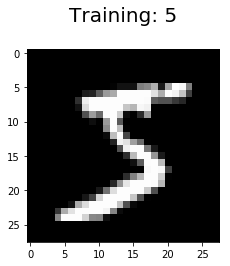

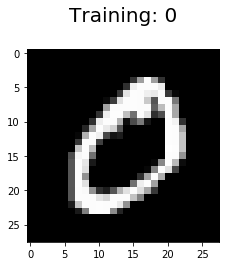

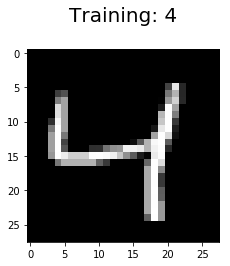

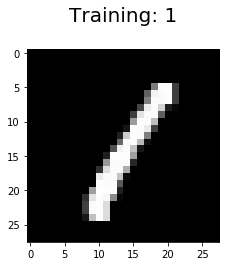

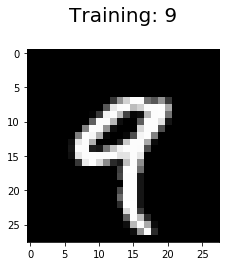

In [2]:
#Show an example of pictures and their labels
for index, (image, label) in enumerate(zip(train_images[0:5], train_labels[0:5])):
    plt.figure(figsize=(20,4))
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)
    plt.show()

In [3]:
def logreg(x, y, z):
    '''
    Use a logistic regression to sort data
    '''
    t = time.time()

    logreg = LogisticRegression(solver='lbfgs') #we use lbfgs solver which is way faster than liblinear
    logreg.fit(x, y)
    fit_time = time.time()-t
    t = time.time()
    print("fit time:", fit_time)
    
    predictions = logreg.predict(z)
    predict_time = time.time()-t
    print("predict time:", predict_time)
    
    print(sys.getsizeof(pickle.dumps(logreg)))
    
    acc = 0
    for k in range(len(predictions)):
        if predictions[k]==test_labels[k]:
            acc+=1
    acc = acc *100/len(predictions)
    print(acc)
    
    return predictions, acc

logreg(train_images, train_labels, test_images)


fit time: 380.37325835227966
predict time: 0.17543840408325195
63677
91.87


(array([7, 2, 1, ..., 4, 5, 6], dtype=uint8), 91.87)